In [1]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import pandas as pd
import matplotlib.pyplot as plt
from functions import dirs, readFile
from wordEmbedders import WESCScore, WESClassifier
import pickle
import chevron
from re import sub

In [2]:
datasets = dirs('../data')
canonicalNames = {}
for dataset in datasets:
    name = readFile(f'../data/{dataset}/CanonicalName.txt')
    canonicalNames[dataset] = name

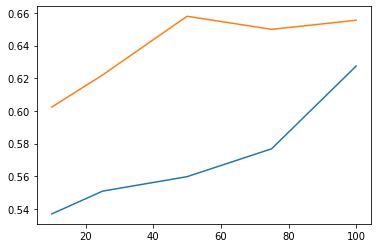

In [3]:
fig, ax = plt.subplots()
sizes = [100, 75, 50, 25, 10]

for dataset in datasets:
    dataFile = f'../corpusSize/data/{dataset}/Predictions.txt'
    results = [float(x) for x in readFile(dataFile).split(',')]

    label = f'{canonicalNames[dataset]}'

    ax.plot(sizes, results, label=label)

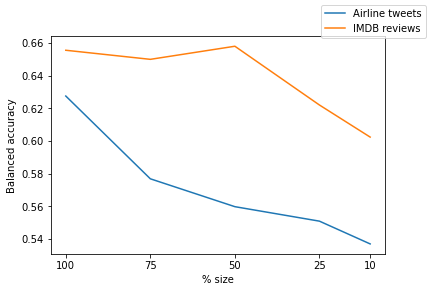

In [4]:
ax.invert_xaxis()
ax.set_xlabel('% size')
ax.set_ylabel('Balanced accuracy')
ax.set_xticks(sizes)
fig.patch.set_alpha(1)
fig.legend()
fig.savefig('./Results-Corpus-Size.png')
fig